<a href="https://colab.research.google.com/github/kibbm/ML-Tensorflow/blob/master/fashonMNIST_CNN_1027(%EC%88%98%EC%97%85%EA%B0%80%EB%8A%A5%EC%BD%94%EB%93%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#패션/옷 분류하기  (fashonMNIST_CNN_1027)
---
(참고!) https://dacon.io/competitions/open/235594/codeshare/2869
https://codetorial.net/tensorflow/fashion_mnist_classification.html
https://ko.d2l.ai/chapter_deep-learning-basics/fashion-mnist.html



---(참고 실패)
https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20Hello%20World%2C%20Fashion-MNIST.md



In [ ]:
import sys
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image

# pj1>=====딥러닝을 사용한 Fashion mnist 분류======

#1.1. Fashion MNIst 데이터셋 불러오기

In [ ]:
#1. Fashion MNIst 데이터셋 불러오기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


#fashion_mnist모듈은 데이터셋을 반환하는 load_data()함수를 포함하는데, load_data()함수를 호출하면 NumPy어레이의 튜플을 반환합니다.

#1.2. Fashion MNIst 데이터셋 살펴보기
---
*   train_images는 0~255사이의 값을 갖는 28*28크기의 NumPy어레이를 갖음.
*   train_labels는 0~9까지의 정수값을 갖는 어레이임.

* > 0 : T-shirt/top
* > 1 : Trouser
* > 2 : Pullover
* > 3 : Dress
* > 4 : Coat
* > 5 : Sandal
* > 6 : Shirt
* > 7 : Sneaker
* > 8 : Bag
* > 9 : Ankel boot


In [ ]:
# train_images와 train_labels의 첫번째 요소를 각각 출력해보기.
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_labels[0])

9


# 2. 데이터 시각화
* matplotlib라이브러리의 imshow()를 사용해 학습데이터셋의 이미지를 시각화하여 데이터셋의 이미지 중 하나를 살펴볼 수 있음.
* 각 이미지는 28x28 모양의 흑백 이미지.

#2.1 학습셋 크기(shape)

In [ ]:
#2.1 학습셋 크기(shape)
import matplotlib.pyplot as plt

#각 어레이의 형태(shape)를 출력해보면, 
#   ...train_images / test_images는 각각 (28x28)형태를 갖는 60000개, 10000개 이미지의 어레이. 
#   ...train_labels / test_labels는 각각 0~9사이의 정수 60000개, 10000개 이미지의 어레이. 
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#2.2 레이블 정의

In [ ]:
#2.2 레이블 정의
fashion_mnist_labels = ["T-shirt/top", #인덱스 0
                        "Trouser",      #인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9                                                                

#2.3 학습데이터 중 이미지 한장을 보여줌

In [ ]:
#2.3 학습데이터 중 이미지 한장을 보여줌

#(train_images, train_labels), (test_images, test_labels)

#이미지 인덱스, 0~59,999 사이의 숫자를 선택할 수 있음.
img_index = 0 #5

#y_train은 9까지의 레이블 포함함.
label_index = train_labels[img_index]

#레이블 출력해보기. ex) 2 pullover(img_index=5), 9 Ankle boot (img_index=0)
print("y= " + str(label_index) + " " + (fashion_mnist_labels[label_index]) )

y= 9 Ankle boot


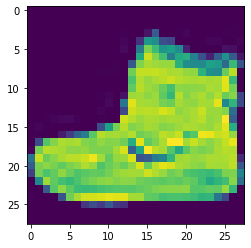

In [ ]:
#학습 데이터 중에서 이미지 한장을 보여주기
plt.imshow(train_images[img_index])

#2.4 학습데이터 16개 보기

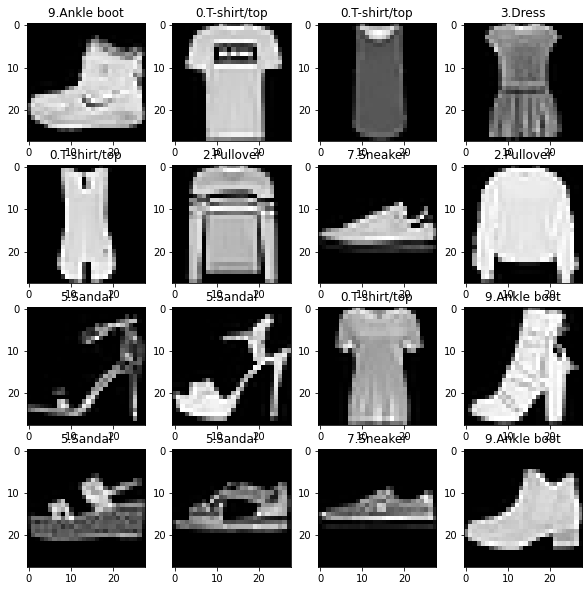

In [ ]:
#2.4 학습데이터 16개 보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))             #사진크기 10x10
for c in range(16):  
  img_index = c                         #이미지 인덱스, 0~59,999 사이의 숫자를 선택할 수 있음  
  label_index = train_labels[img_index] #y_train은 9까지의 레이블 포함함.  
  
  plt.subplot(4, 4, c+1)                #4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16버너째 칸을 채우게 됩니다.
  plt.imshow(train_images[c].reshape(28, 28), cmap='gray')                          #gray로 이미지 보여주기
  plt.title('{}.{}'.format(str(label_index), fashion_mnist_labels[label_index]))    #각 이미지의 label_index와 패션라벨 보여주기.
plt.show()  

#3. Fashion MNIST 데이터셋 **전처리**하기

#3.1 데이터 정규화(Data normalization)

* 데이터 크기를 정규화하여 대략적으로 데이터 크기를 동일하게 맞춤.


In [ ]:
#데이터 전처리
train_images, test_images = train_images/255.0, test_images/255.0 #훈련/테스트 데이터들을 0.0~1.0사이의 값을 갖도록 변환함.

'''같은 코드
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
'''

#4. 모델 구상하기
---
* Keras에서 모델을 정의하기위한 두 가지 API는 다음과 같습니다. [ 시퀀스 모델 API(순차 모델 API), 함수 API]
* 이 튜토리얼에서는, **시퀀스 모델 API를 사용**하여 ***컨볼루션 레이어(CNN)을 반복하는 간단한 CNN 모델을 만들고 풀링 레이어, 드롭 아웃 레이어***를 만듭니다

> 입력 데이터의 크기(shape)는 첫 번째 레이어에서만 정의해주면 됩니다. 마지막 레이어의 결과 값은 소프트맥스 활성화 함수를 거치며, 여기서 Fashion-MNIST의 10가지 범주의 데이터를 분류합니다. 마지막 레이어는 덴스(dense)레이어 로 소프트맥스 활성화가 되어있으며, fashion_mnist에서 10가지 범주의 데이터를 분류합니다.

> **소프트맥스 함수**는 다중 클래스분류 문제에서 출력층에 주로 쓰입니다.
덴스(dense)레이어는 이전 레이어의 모든 뉴런과 결합된 형태의 레이어입니다.

#4.1 모델 구상

In [ ]:
#4. 모델 구상
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')    
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#5.1 모델 컴파일하기

In [ ]:
#5. 모델 컴파일
model.compile(optimizer='adam', #최적화 함수
              loss='sparse_categorical_crossentropy', #오차 함수
              metrics=['accuracy']) #모델이 컴파일될때 모델 수행 결과를 나타내게끔 설정하는 부분. 

#6.1 모델 학습시키기(Train the model)

---
* **fit**을 사용하여 배치(batch) 사이즈는 64, 에포크(epochs)는 10으로 **모델을 학습**시킵니다. 

*  ModelCheckpoint API를 사용하여 에폭(epoch)마다 모델을 저장할 수 있습니다. **검증 정확도(validation accuracy)가 향상되었을 때 저장**하려면 save_best_only = True로 설정하면 됩니다.

* **배치(batch)**는 전체 데이터 셋 중에서 64개씩 학습시키는 것을 말하며, 에포크(epochs)는 전체 데이터셋을 몇번 학습시킬 것인지를 나타냅니다.


In [ ]:
#6.모델 훈련
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 5.0830 - accuracy: 0.7642
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5401 - accuracy: 0.8164
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5164 - accuracy: 0.8223
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5005 - accuracy: 0.8313
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4857 - accuracy: 0.8377


#7.1 모델의 정확도 평가하기

---
..evaluate()메서드를 이용해서 손실(loss)와 정확도(accuracy)를 얻을 수 있음.


In [ ]:
#7. 모델의 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

#5회 epoch의 학습을 통해 10000개의 테스트 이미지를 82%의 정확도로 분류할 수 있음을 의미함.

313/313 [==============================] - 1s 3ms/step - loss: 0.5563 - accuracy: 0.8200
0.5563375353813171 0.8199999928474426


# #Test1>.. X 전처리 후 다시 학습시키면, 정확도가 더 높아질까??  : **82%->88% 으로 상승!**

---
X: (images)이제 이 데이터를 255로 나누어 주자. 0에서 255의 숫자의 배열로 이루어진 이미지 데이터를 255로 나누어 주어 0~1로 변환 사켜주는 작업이다. 케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보이기 때문이다. 따라서 astype()함수를 통해 실수형으로 바꿔준 후 255로 나누는 작업을 진행 했다.


In [ ]:
#데이터 전처리
train_images= train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')/255.0 #훈련/테스트 이미지 데이터들을 0.0~1.0사이의 값을 갖도록 변환함.
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')/255.0 

In [ ]:
#4. 모델 구상
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')    
])

model.summary()

#5. 모델 컴파일
model.compile(optimizer='adam',                       #활성화함수() .. sigmoid, relu, softmax..
              loss='sparse_categorical_crossentropy', #손실함수()...cross-entropy, binary_crossentropy, categorical_crossentropy
              metrics=['accuracy'])


#6.모델 훈련
model.fit(train_images, train_labels, epochs=5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4728 - accuracy: 0.8307
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3597 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3230 - accuracy: 0.8824
Epoch 4/5

#8.1 예측하기

In [ ]:
import numpy as np

predictions = model.predict(test_images)
print(predictions[5])
print(np.argmax(predictions[5]))

# 첫번째 예측 predictions[0]을 출력해보면 10개의 값을 갖는 어레이이며, 입력 이미지 데이터가 열개의 숫자중 어떤 숫자일지 확률을 의미함.
# np.argmax()함수를 이용해서 가장 높은 값을 갖는 인덱스를 확인해보면 9를 출력함.
#  ...즉, 학습된 신경망은 이 이미지가 ankle boot라고 예측합니다.

313/313 [==============================] - 1s 3ms/step
[4.1528649e-05 9.9993950e-01 1.1586347e-07 1.4528892e-05 9.5131116e-07
 7.6347685e-13 3.3019044e-06 1.4484015e-16 4.3137969e-09 3.1334851e-11]
1


In [ ]:
#7. 모델의 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

#5회 epoch의 학습을 통해 10000개의 테스트 이미지를 88%의 정확도로 분류할 수 있음을 의미함.

313/313 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.8802
0.3317930996417999 0.8802000284194946


# 9.1 뉴런의 개수의 영향


---
 가운데 뉴런 층의 뉴런 노드의 개수를 조절하면 훈련에 어떤 영향을 미치는지 알아보자~


In [ ]:
# 4. 모델의 구성
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'), #CASE1    #87%
      #tf.keras.layers.Dense(512, activation='relu'), #CASE2     
      #tf.keras.layers.Dense(2048, activation='relu'), #CASE3    #86%
      tf.keras.layers.Dense(10, activation='softmax')    
])

In [ ]:
#5. 모델 컴파일
model.compile(optimizer='adam',                       #활성화함수() .. sigmoid, relu, softmax..
              loss='sparse_categorical_crossentropy', #손실함수()...cross-entropy, binary_crossentropy, categorical_crossentropy
              metrics=['accuracy'])


In [ ]:
#6.모델 훈련
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4745 - accuracy: 0.8306
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3575 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3231 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2970 - accuracy: 0.8902
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2787 - accuracy: 0.8966


In [ ]:
#7. 모델의 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.8645
0.38942721486091614 0.8644999861717224


In [ ]:
import numpy as np

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
[3.0177574e-05 8.8189819e-07 1.7113180e-05 6.5359410e-07 3.6281363e-05
 8.8355923e-03 6.4020409e-05 4.7769133e-02 8.9832227e-04 9.4234771e-01]
9


*  뉴런 노드의 개수가 증가하면 훈련 과정에서 손실 값이 감소하고 테스트 정확도는 증가하는 경향이 있습니다. 
*  하지만 계산과 최적화를 필요로 하는 파라미터의 숫자가 증가하기 때문에 훈련에 걸리는 시간은 증가합니다.
*  512개와 1024개에서 손실과 정확도의 증가가 크지 않은 이유는 Fashion MNIST분류 문제가 비교적 간단한 문제이기 때문임. 
*  따라서 문제에 맞게 적절한 개수의 뉴런을 사용하면서 짧은 훈련 시간 동안 높은 정확도를 얻는 것이 좋음.

In [ ]:
#fashion_mnist_labels[label_index] 활용해 변경byKB

import numpy as np

predictions = model.predict(test_images)

label_index = 5
print(predictions[label_index])           #이걸 변수로 넣어보자~
print(np.argmax(predictions[label_index]))

predict_label_index = np.argmax(predictions[label_index])
print("예상 카테고리: ", fashion_mnist_labels[predict_label_index])

313/313 [==============================] - 1s 2ms/step
[3.4699180e-05 9.9995953e-01 1.0560709e-06 3.5339451e-07 9.6108954e-07
 3.8133182e-13 3.3446613e-06 1.5228178e-11 4.9214390e-11 4.6148038e-12]
1
예상 카테고리:  Trouser


#10. 콜백(callback) 사용하기

---
훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있음.


In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={} ):
    if logs.get('loss') < 0.3:
      print('\n 훈련을 중지합니다.')
      self.model.stop_training= True

callbacks = myCallback()

#1. 데이터셋 임포트
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#2. 데이터 전처리
train_images, test_images = train_images/255.0, test_images/255.0

#4. 모델 구성
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),      
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')    
])

#5. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#6.모델 훈련
model.fit(train_images, train_labels, epochs=5)

#7. 모델의 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4717 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3582 - accuracy: 0.8694
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3220 - accuracy: 0.8829
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.8898
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8663
0.37998878955841064 0.8662999868392944


훈련 중에 손실 값이 특정 기준 미만이 되었을 때 훈련을 중단할 수 있습니다.

# pj2>=====CNN을 사용한 Fashion mnist 분류======
. *CNN*적용, 정확도가 더 높아질까??
---
https://dacon.io/competitions/open/235594/codeshare/2869

4-1. 모델 설계
모델을 만들어보자. 우선 model.Sequential()한수를 사용하여 model을 선언 해주고 model.add()를 사용하여 차곡차곡 하나씩 층을 만들어 주려고 한다. 다음을 보자.

**a. Convolution층**

* 케라스에서 Convolution층을 추가하는 함수는 Conv2D()이다.
* * model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28,28,1), activation='relu'))
32: 32개의 mask를 사용
* * kernel_size: (3,3)의 커널을 정한다.
* * input_shape: (28,28,1)
* * activation: 활성화 함수를 relu로 정해준다.

* model.add(Conv2D(64,(3,3), activation='relu'))
* * mask 64를 적용한 새로운 Convolution층을 하나 더 추가한다.

**b. Maxpooling**

이제 추가로 Maxpooling 층울 추가 하보자. convolution으로 층을 추가 했지만 여전히 크기 때문에 한번 더 축소를 진행 한다.

* model.add(MaxPooling2D(pool_size=2))
* * pool_size: pooling창의 크기를 정하는 것으로 2로 정하여 줄여 주었다.

**c. Drop out & Flatten**

* model.add(Dropout(0.25))
* * 딥러닝을 학습할때 과적합을 효과적으로 피해가는 방법중 다음의 기법이 있다. drop out기법인데, 이는 은닉층에 배치된 노드 중 일부를 임의로 껴주는 것이다.

* model.add(Flatten())
* * convolution이나 max pooling는 2차원 배열인 채로 다루는데, 이를 1차원으로 바꿔주자.

#1.1 Fashion MNIst 데이터셋 불러오기

In [2]:
#1. Fashion MNIst 데이터셋 불러오기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#2.1 레이블 정의

In [19]:
#2.1 레이블 정의
fashion_mnist_labels = ["T-shirt/top", #인덱스 0
                        "Trouser",      #인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9                                                                

In [ ]:
'''
# 데이터 용량 줄이기~~~~~~~(수업내 안 끝날 수 있으니, 10000개의 이미지 데이터 중 8000개/2000개로 분리시켜 줌.)
#1. Train/test set 분류
from sklearn.model_selection import train_test_split
train_images, train_labels, test_images, test_labels = train_test_split(train_images, train_labels,test_size=0.2, random_state=100)

train_images = train_images.values.reshape(-1, 28, 28, 1)


print("Train set 이미지수: {}개".format(train_images.shape[0]))
print("Validation set 이미지수: {}개".format(test_images.shape[0]))
'''

ValueError: ignored

#3.1 데이터 전처리

In [4]:
#3.1 데이터 전처리
train_images= train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')/255.0 #훈련/테스트 이미지 데이터들을 0.0~1.0사이의 값을 갖도록 변환함.
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')/255.0 

train_labels = tf.keras.utils.to_categorical(train_labels) #0, 1로만 이루어진 원핫인코딩 적용. keras.utils.to_categorical()
test_labels = tf.keras.utils.to_categorical(test_labels)

#4.1 컨볼루션 신경망 설정
---
* Keras에서 모델을 정의하기위한 두 가지 API는 다음과 같습니다. [ 시퀀스 모델 API(순차 모델 API), 함수 API]
* 이 튜토리얼에서는, **시퀀스 모델 API를 사용**하여 ***컨볼루션 레이어(CNN)을 반복하는 간단한 CNN 모델을 만들고 풀링 레이어, 드롭 아웃 레이어***를 만듭니다

> 입력 데이터의 크기(shape)는 첫 번째 레이어에서만 정의해주면 됩니다. 마지막 레이어의 결과 값은 소프트맥스 활성화 함수를 거치며, 여기서 Fashion-MNIST의 10가지 범주의 데이터를 분류합니다. 마지막 레이어는 덴스(dense)레이어 로 소프트맥스 활성화가 되어있으며, fashion_mnist에서 10가지 범주의 데이터를 분류합니다.

> **소프트맥스 함수**는 다중 클래스분류 문제에서 출력층에 주로 쓰입니다.
덴스(dense)레이어는 이전 레이어의 모든 뉴런과 결합된 형태의 레이어입니다.

In [5]:
#4. 컨볼루션 신경망 설정
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

#5.1 모델 컴파일

In [6]:
#5. 모델 컴파일
model.compile(optimizer='adam',                       #활성화함수() .. sigmoid, relu, softmax..
              #loss='sparse_categorical_crossentropy', #손실함수()...cross-entropy, binary_crossentropy, categorical_crossentropy
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#5.1 모델 최적화 설정
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#6.1 모델 학습시키기(Train the model)

---
* **fit**을 사용하여 배치(batch) 사이즈는 64, 에포크(epochs)는 10으로 **모델을 학습**시킵니다. 

*  ModelCheckpoint API를 사용하여 에폭(epoch)마다 모델을 저장할 수 있습니다. **검증 정확도(validation accuracy)가 향상되었을 때 저장**하려면 save_best_only = True로 설정하면 됩니다.

* **배치(batch)**는 전체 데이터 셋 중에서 64개씩 학습시키는 것을 말하며, 에포크(epochs)는 전체 데이터셋을 몇번 학습시킬 것인지를 나타냅니다.


In [11]:
#6.모델 훈련
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                    epochs=20, batch_size=200, verbose=0,          
                    callbacks=[early_stopping_callback, checkpointer] )



Epoch 1: val_loss improved from inf to 0.61907, saving model to 01-0.6191.hdf5

Epoch 2: val_loss improved from 0.61907 to 0.56332, saving model to 02-0.5633.hdf5

Epoch 3: val_loss improved from 0.56332 to 0.54108, saving model to 03-0.5411.hdf5

Epoch 4: val_loss improved from 0.54108 to 0.50518, saving model to 04-0.5052.hdf5

Epoch 5: val_loss improved from 0.50518 to 0.49088, saving model to 05-0.4909.hdf5

Epoch 6: val_loss improved from 0.49088 to 0.47058, saving model to 06-0.4706.hdf5

Epoch 7: val_loss improved from 0.47058 to 0.45663, saving model to 07-0.4566.hdf5

Epoch 8: val_loss improved from 0.45663 to 0.44799, saving model to 08-0.4480.hdf5

Epoch 9: val_loss improved from 0.44799 to 0.43237, saving model to 09-0.4324.hdf5

Epoch 10: val_loss improved from 0.43237 to 0.41633, saving model to 10-0.4163.hdf5

Epoch 11: val_loss improved from 0.41633 to 0.41479, saving model to 11-0.4148.hdf5

Epoch 12: val_loss improved from 0.41479 to 0.39996, saving model to 12-0.400

ValueError: ignored

In [12]:
#print("\n Test Accuracy: %.4f" % (model.evaluate(test_images, test_labels[1])))

ValueError: ignored

#7.1 오차와 정확도 확인(loss / Test Accuracy)
---
실행 결과를 그래프로 확인해보자. 오차와 정확도를 확인하려 한다. 


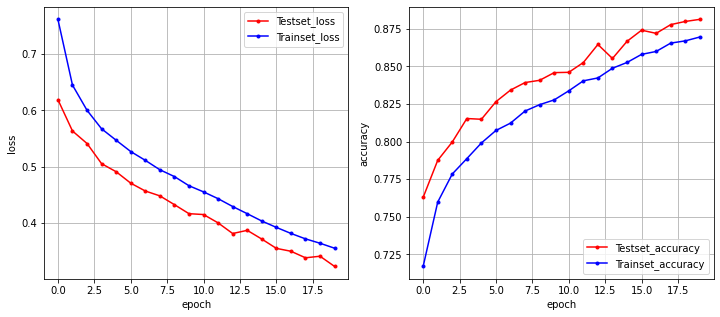

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#=====1. 그래프로 표현(Testset_loss / Trainset_loss)=====오차, 학습셋 오차
y_vloss = history.history['val_loss'] #오차
y_loss = history.history['loss'] #학습셋 오차

x_len = np.arange(len(y_loss)) 
ax1.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
ax1.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

ax1.legend(loc='upper right') #그래프에 그리드를 주고 레이블을 표시
ax1.grid()
ax1.set(xlabel='epoch', ylabel='loss')

#=====2. 그래프로 표현(Testset_accuracy / Trainset_accuracy)=====정확도, 학습셋
y_vaccuracy = history.history['val_accuracy'] #정확도
y_accuracy = history.history['accuracy'] #학습셋

x_len = np.arange(len(y_accuracy)) 
ax2.plot(x_len, y_vaccuracy, marker='.', c='red', label='Testset_accuracy')
ax2.plot(x_len, y_accuracy, marker='.', c='blue', label='Trainset_accuracy')

ax2.legend(loc='lower right') #그래프에 그리드를 주고 레이블을 표시
ax2.grid()
ax2.set(xlabel='epoch', ylabel='accuracy')

#=====그리기=====
plt.show()

#8.1 틀린 데이터 확인...예측값 시각화하기 (Visualize the predictions)
---
* 8.1 분류를 하는데 어떤 것을 틀렸는지 확인해보자
* 8.2 우선 confusion_matrix을 통해 어떻게 분류했는지 확인해보자.
* 8.3 이미지를 통해 틀린 것을 확인해 보자.


In [16]:
# 8.1 분류를 하는데 어떤 것을 틀렸는지 확인해보자
y_pred = model.predict(test_images).round(2)

y_val_label = list(map(np.argmax, test_labels))
y_pred_label = list(map(np.argmax, y_pred))

313/313 [==============================] - 7s 23ms/step


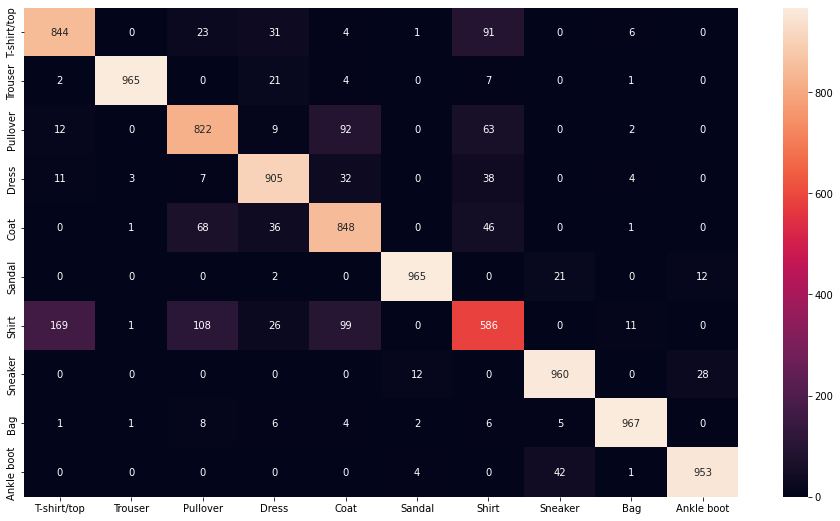

In [20]:
# 8.2 우선 confusion_matrix을 통해 어떻게 분류했는지 확인해보자.
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(16, 9) )
cm = confusion_matrix(y_val_label, y_pred_label)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels)

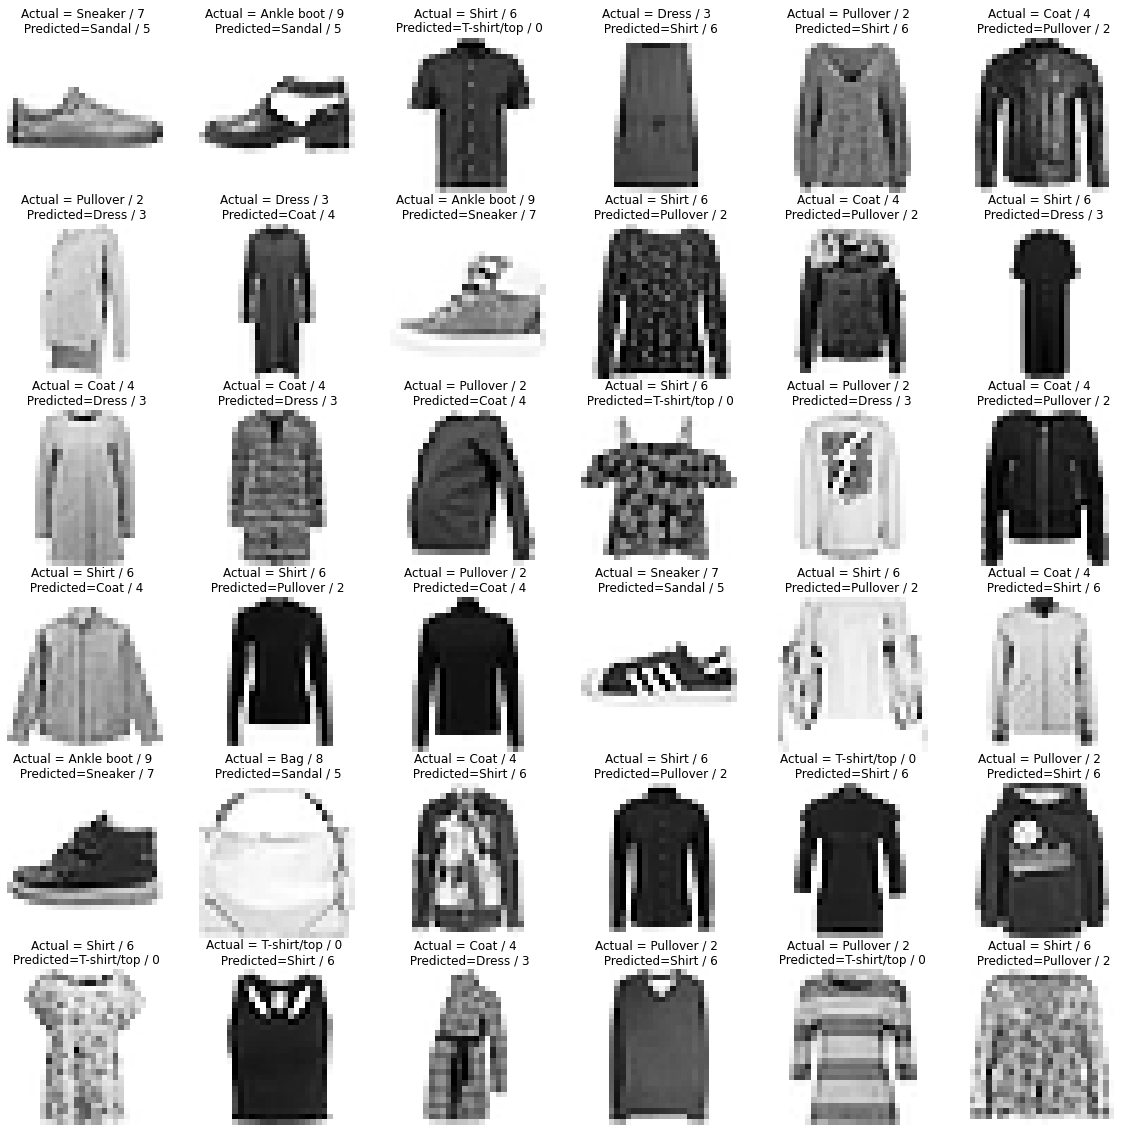

In [22]:
#8.3 이미지를 통해 틀린 것을 확인해 보자.
aaa = np.array(y_val_label) != np.array(y_pred_label)
not_equel_list = np.where(aaa==True)[0]

plt.figure(figsize=(20, 20))
j = 1
for i in not_equel_list[0:36]:
  plt.subplot(6, 6, j);   j+=1
  plt.imshow(test_images[i].reshape(28, 28), cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \n Predicted={} / {}'.format(fashion_mnist_labels[y_val_label[i]],
                                                           y_val_label[i],
                                                           fashion_mnist_labels[y_pred_label[i]],
                                                           y_pred_label[i] ))
  
#..............위의 사진을 보면 shirt를 pullover로 분류하고
#                               ankle boot를 sneaker로 분류한 것도 있는데
#                               사실 이 부분은 나도 구분을 못하긴 하겠다~

#9.1 학습시킨 데이터를 csv로 저장하기

In [24]:
import pandas as pd

results = model.predict(test_images)  
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")

313/313 [==============================] - 8s 25ms/step


In [25]:
#학습시킨 데이터를 csv로 저장하기

submission = pd.concat([ pd.Series(range(1, 28001), name="ImageId"), results ], axis=1)
submission.to_csv("result_fashion_mnist.csv", index=False)


#<마치며...>
===외부코드와 kb변수명 맞추기~^^===
* 외부코드: 'X_train, Y_train, X_val, Y_val'을 쓰기도..
* (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
* fashion_mnist_labels

# pj3>=====CNN을 사용한 (다른 모델 설계)Fashion mnist 분류=====
---
===== 
https://github.com/KerasKorea/KEKOxTutorial/blob/master/10_Fashion-MNIST%20with%20tf.Keras/10_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%98%20Hello%20World%2C%20Fashion-MNIST.md


#1.1 데이터셋 불러오기

In [27]:
#1.1 데이터셋 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 미리 섞여진 fashoin-mnist의 학습 데이터와 테스트 데이터 로드
# (학습 이미지, 학습 레이블), (테스트 이미지, 테스트 레이블)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


#2.1 데이터 시각화

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


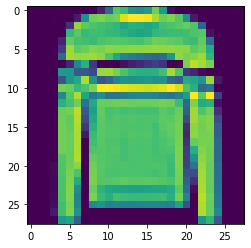

In [28]:
#2.1 데이터 시각화
# 학습 셋 크기(shape) - 이미지 크기가 28x28 인 60,000 개의 학습 이미지 데이터, 60,000 개의 레이블
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습 셋과 테스트 셋의 데이터 개수
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2
                        "Dress",        # 인덱스 3
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6
                        "Sneaker",      # 인덱스 7
                        "Bag",          # 인덱스 8
                        "Ankle boot"]   # 인덱스 9

# 이미지 인덱스, 0에서 59,999 사이의 숫자를 선택할 수 있습니다.
img_index = 5

# y_train 은 에서 9까지의 레이블 포함합니다.
label_index = y_train[img_index]

# 레이블 출력해 봅니다. 예를들어 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# 학습 데이터 중에서 이미지 한 장을 보여줍니다.
plt.imshow(x_train[img_index])

#3.1 데이터 정규화

In [29]:
#3.1 데이터 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#4.1 데이터를 학습/검증/테스트 셋으로 나누기(Split the data into train/validation/test datasets)
---
>데이터를 임포팅하는 과정에서, 60,000개의 학습 셋과 10,000개의 테스트셋을 얻을 수 있습니다. 이제 학습 셋을 학습 셋/검증 셋으로 나누고자 합니다. 딥러닝에서 각 유형의 데이터셋이 사용되는 방법은 다음과 같습니다.
...(현재코드에서 검증은 제외하겠습니다~)

* Training data(학습 데이터) - 모델을 학습에 사용하는 데이터
* Validation data(검증 데이터) - 하이퍼파라미터를 튜닝하고 모델을 검증하기 위해 사용하는 데이터
* Test data(테스트 데이터) - 검증 셋으로 모델의 초기 검사를 마친 후에, 모델을 테스트하는 데이터

In [30]:
#4.1 학습 데이터 셋을 학습 / 평가 셋으로 나눈다. (# 학습 셋: 55,000, 검증 셋: 5000)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# 입력 이미지의 크기를 (28, 28) 에서 (28, 28, 1) 로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# 레이블에 원-핫 인코딩 적용
# 원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 학습 셋 크기
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# 학습용, 검증용, 테스트용 데이터셋의 개수
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


#5.1 모델 아키텍처 만들기

In [31]:
#5.1 모델 아키텍처 만들기
model = tf.keras.Sequential()

#신경망의 첫번째 레이어에서 입력 데이터 크기를 정의해야 함.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten()) #flatten()은 이미지를 일차원으로 바꿔줌.
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

#model.summary()를 통해 모델을 살펴보기.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

#5.2 모델 컴파일하기

In [33]:
#5.2 모델 컴파일하기
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#6.1 모델 학습시키기

In [34]:
#6.1 모델 학습시키기
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5617 - accuracy: 0.7945
Epoch 1: val_loss improved from inf to 0.41655, saving model to model.weights.best.hdf5
860/860 [==============================] - 66s 76ms/step - loss: 0.5616 - accuracy: 0.7945 - val_loss: 0.4165 - val_accuracy: 0.8538
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8532
Epoch 2: val_loss improved from 0.41655 to 0.34236, saving model to model.weights.best.hdf5
860/860 [==============================] - 73s 85ms/step - loss: 0.4013 - accuracy: 0.8532 - val_loss: 0.3424 - val_accuracy: 0.8848
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3671 - accuracy: 0.8661
Epoch 3: val_loss improved from 0.34236 to 0.31451, saving model to model.weights.best.hdf5
860/860 [==============================] - 71s 83ms/step - loss: 0.3673 - accuracy: 0.8661 - val_loss: 0.3145 - val_accuracy: 0.8908
Epoch 4/10
859/860 [=====================

#7.1 가장 높은 검증 정확도의 가중치 불러오기(Load Model with the best validation accuracy)

In [35]:
#7.1 가장 높은 검증 정확도의 가중치 불러오기(Load Model with the best validation accuracy)
model.load_weights('model.weights.best.hdf5')

#8.1 테스트 정확도(Test Accuracy)
---
90%의 정확도!


In [36]:
#8.1 테스트 정확도(Test Accuracy)

# 테스트 셋으로 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9018999934196472


#9.1 틀린 데이터 확인...예측값 시각화하기 (Visualize the predictions)

313/313 [==============================] - 3s 9ms/step


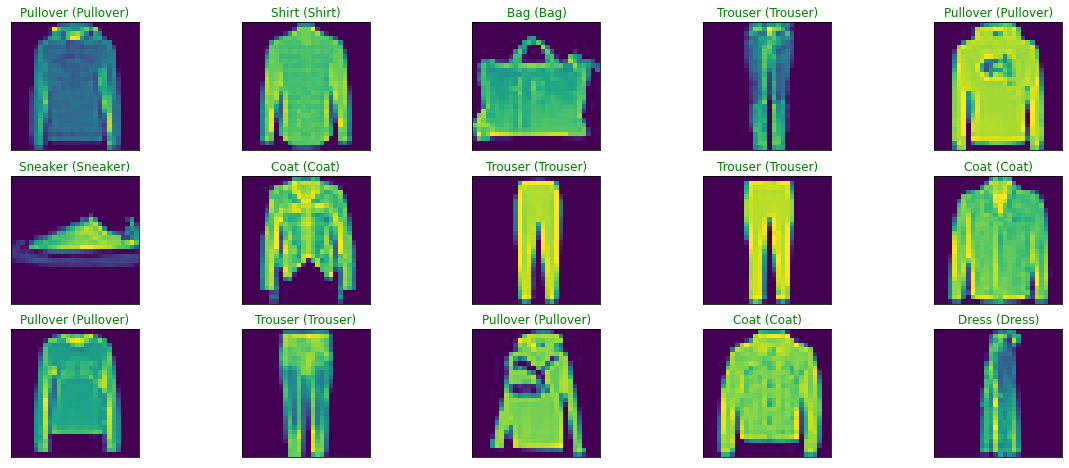

In [37]:
#9.1 예측값 시각화하기 (Visualize the predictions)

# y_hat은 test 데이터셋 예측
y_hat = model.predict(x_test)

# 무작위 샘플로 10 개의 테스트 이미지와 예측 레이블 및 실제 레이블을 그려줍니다.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index])) # 각각의 이미지를 보여줌
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index]) # 각각의 이미지에 예측레이블 (실제레이블) 표시
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))